# Autoregrssive Model

We start with standard imports and reading in data.

In [8]:
import pandas as pd
import random
import numpy as np
import sklearn.preprocessing as prep
from matplotlib import pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
random.seed(0)

In [9]:
df = pd.read_csv("AMZN.csv")

Here, we split the data into x and y variables, and also train test sets.

In [10]:
y = df["Close"]
train_size = int(len(y) * 0.8)
train, test = y[:train_size], y[train_size:]

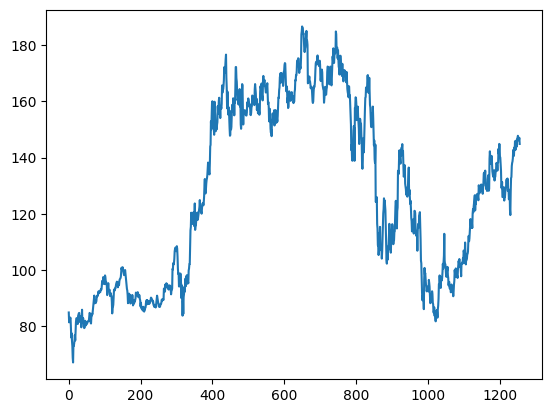

In [11]:
plt.plot(df["Close"])
plt.show()

Construct and fit the model. We can also experiment with different lags numbers.

In [19]:
model1 = AutoReg(train, lags=100)
model2 = AutoReg(train, lags=10)
model_fit1 = model1.fit()
model_fit2 = model2.fit()

In [22]:
predictions1 = model_fit1.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)
predictions2 = model_fit2.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

In [24]:
mse1 = mean_squared_error(test, predictions1)
mse2 = mean_squared_error(test, predictions2)
print(f'Mean Squared Error for 100 lags: {mse1}')
print(f'Mean Squared Error for 10 lags: {mse2}')

Mean Squared Error for 100 lags: 331.8351375059268
Mean Squared Error for 10 lags: 178.64521676271747


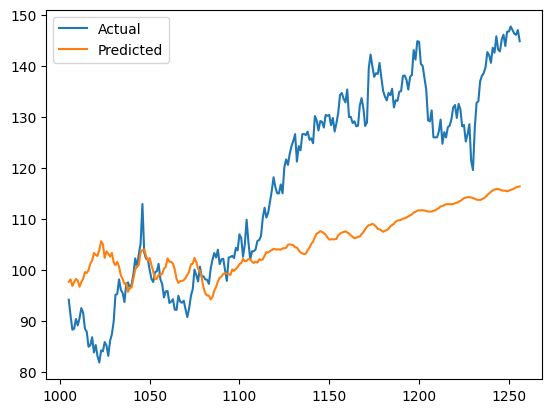

In [25]:
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions1, label='Predicted')
plt.legend()
plt.show()

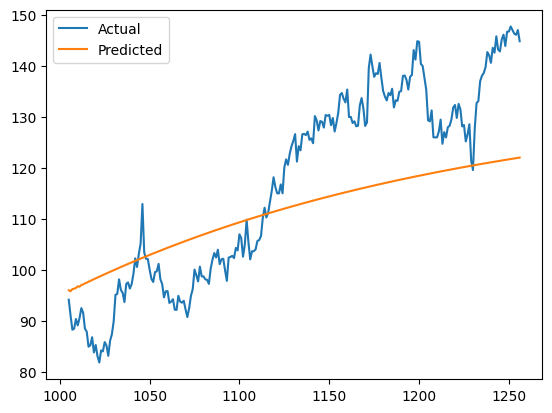

In [26]:
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions2, label='Predicted')
plt.legend()
plt.show()